In [ ]:
import pandas_datareader.data as web
from datetime import datetime
start = datetime(2017,1,1)
end = datetime.today()

In [ ]:
stock_nflx = web.DataReader("NFLX", "yahoo", start, end)

In [ ]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from IPython.core.pylabtools import figsize
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Import the data
stock_neflix=pd.read_csv('NFLX.csv')
abc=stock_neflix.loc[:,['price','Pre_5','Pre_4','Pre_3','Pre_2','Pre_1','ln_vol']]
X=stock_neflix.loc[:,['Pre_5','Pre_4','Pre_3','Pre_2','Pre_1','ln_vol']]
y=stock_neflix['price']

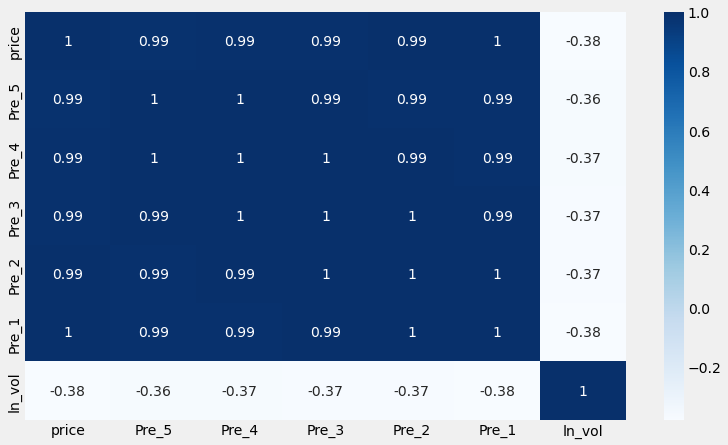

In [ ]:
#Correlation analysis
import seaborn as sns
plt.figure(figsize=(12,7))
sns.heatmap(abc.corr(),annot=True,cmap='Blues')

In [ ]:
#Prepare training set and testing set
X_train=X.loc[0:1001,:]
X_test=X.loc[1002:1330,:]
y_train=y.loc[0:1001]
y_test=y.loc[1002:1330]

Linear Regression

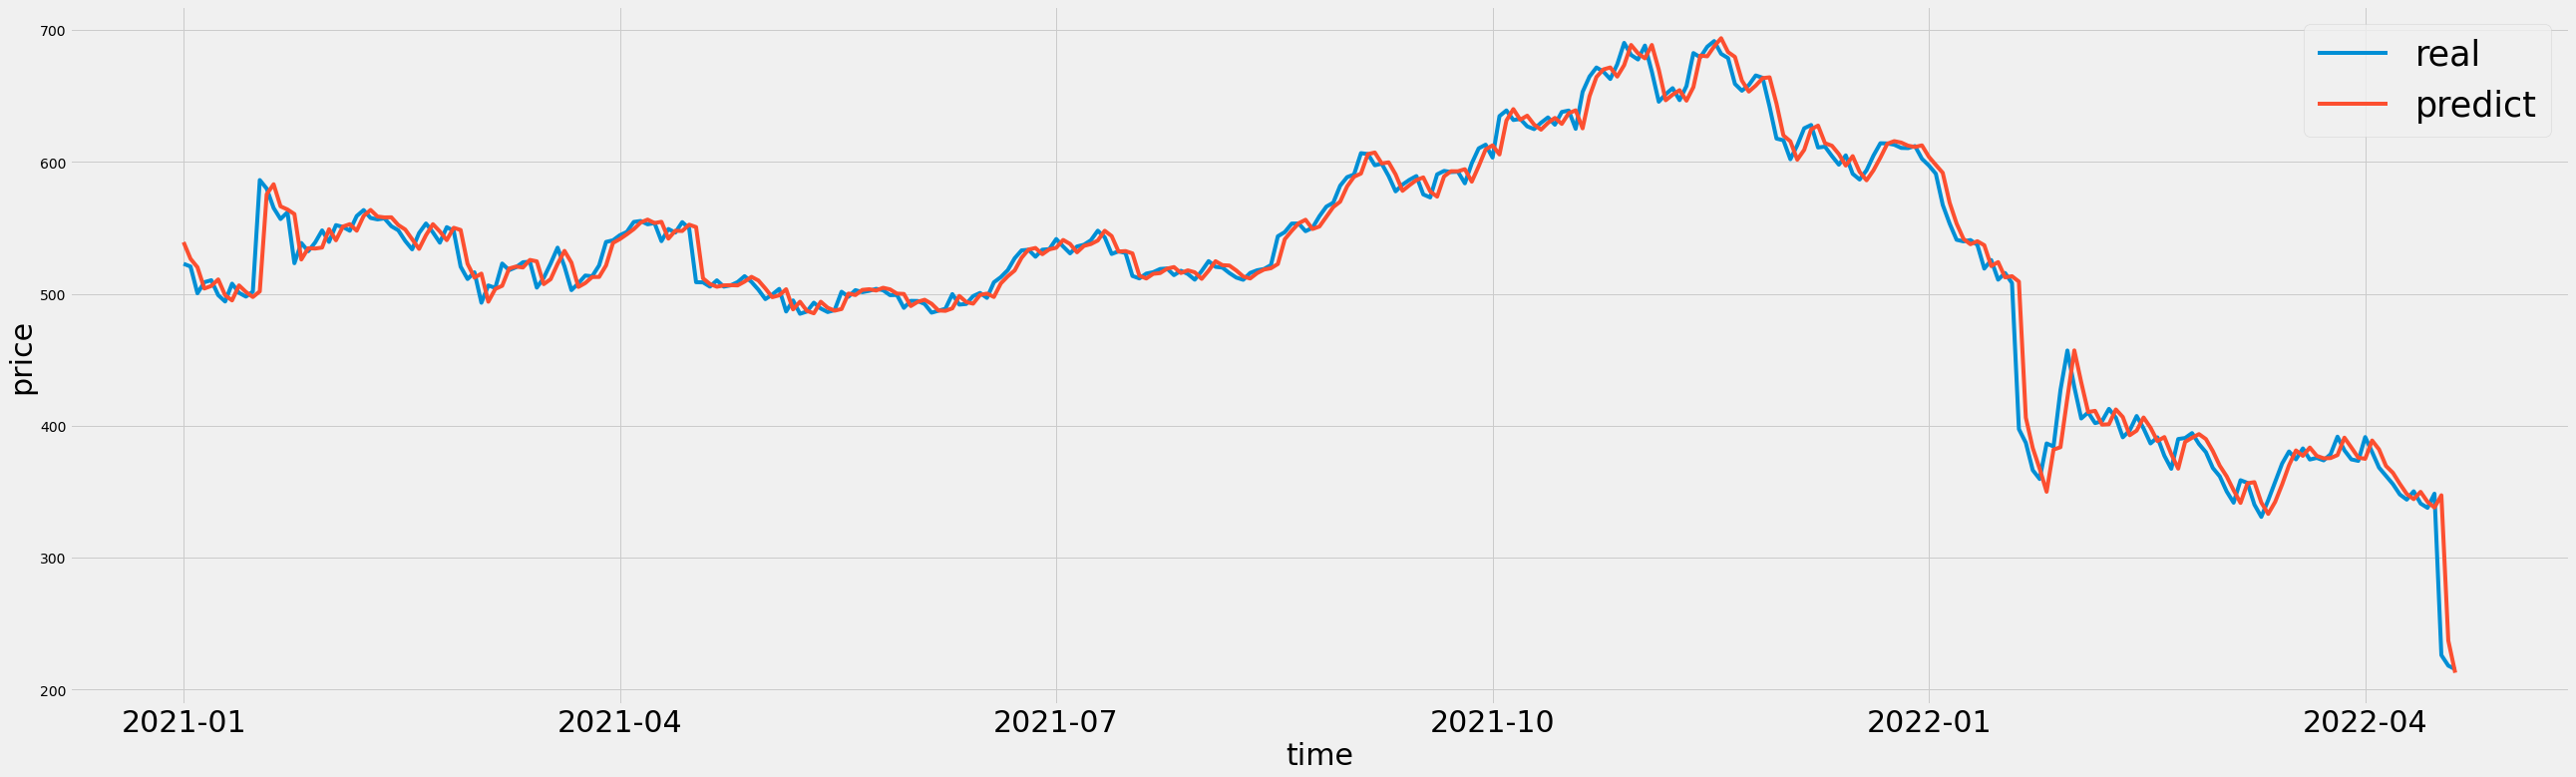

220.26206870486124
0.9732184378363278


In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)
lr_predict=linear.predict(X_test)
date=stock_neflix.date
plt.figure(figsize(40,12))
plt.plot(date.loc[1002:1330],y_test,label="real")
plt.plot(date.loc[1002:1330],lr_predict,label="predict")
plt.xlabel("time",fontsize=30)
plt.xticks(date.loc[1002:1330][::63],labels=['2021-01','2021-04','2021-07','2021-10','2022-01','2022-04'],fontsize=30)
plt.ylabel("price",fontsize=30)
plt.legend(loc="upper right",fontsize=35)
plt.show()
lr_MSE=mean_squared_error(y_test,lr_predict)
print(lr_MSE)
lr_r2=r2_score(y_test,lr_predict)
print(lr_r2)

Random Forest

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200,random_state=42)
rf.fit(X_train,y_train)
rf_predict=rf.predict(X_test)
rf_MSE=mean_squared_error(y_test,rf_predict)
print(rf_MSE)
rf_r2=r2_score(y_test,rf_predict)
print(rf_r2)

2723.1943821239483
0.6688880656689946


In [ ]:
#Show the tree

# 导入所需工具包
from sklearn.tree import export_graphviz
import pydot #pip install pydot

# 拿到其中的一棵树
tree = rf.estimators_[5]

# 导出成dot文件
feature_list='Pre_5','Pre_4','Pre_3','Pre_2','Pre_1','ln_vol'
export_graphviz(tree, out_file = 'tree.dot', feature_names=feature_list, rounded = True, precision = 1)

# 绘图
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# 展示
graph.write_png("Whole_tree.png")

print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 19


In [ ]:
#限制深度
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(X_train,y_train)
rf_small_predict=rf_small.predict(X_test)
rf_small_MSE=mean_squared_error(y_test,rf_small_predict)
print(rf_small_MSE)
rf_small_r2=r2_score(y_test,rf_small_predict)
print(rf_small_r2)
# 提取一颗树
tree_small = rf_small.estimators_[8]

# 保存
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png')

5137.646935262639
0.3753159062711575


In [ ]:
# 得到特征重要性
importances = list(rf.feature_importances_)

# 转换格式
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# 排序
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# 对应进行打印
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Pre_1                Importance: 0.92
Variable: Pre_5                Importance: 0.04
Variable: Pre_4                Importance: 0.01
Variable: Pre_3                Importance: 0.01
Variable: Pre_2                Importance: 0.01
Variable: ln_vol               Importance: 0.0


[None, None, None, None, None, None]

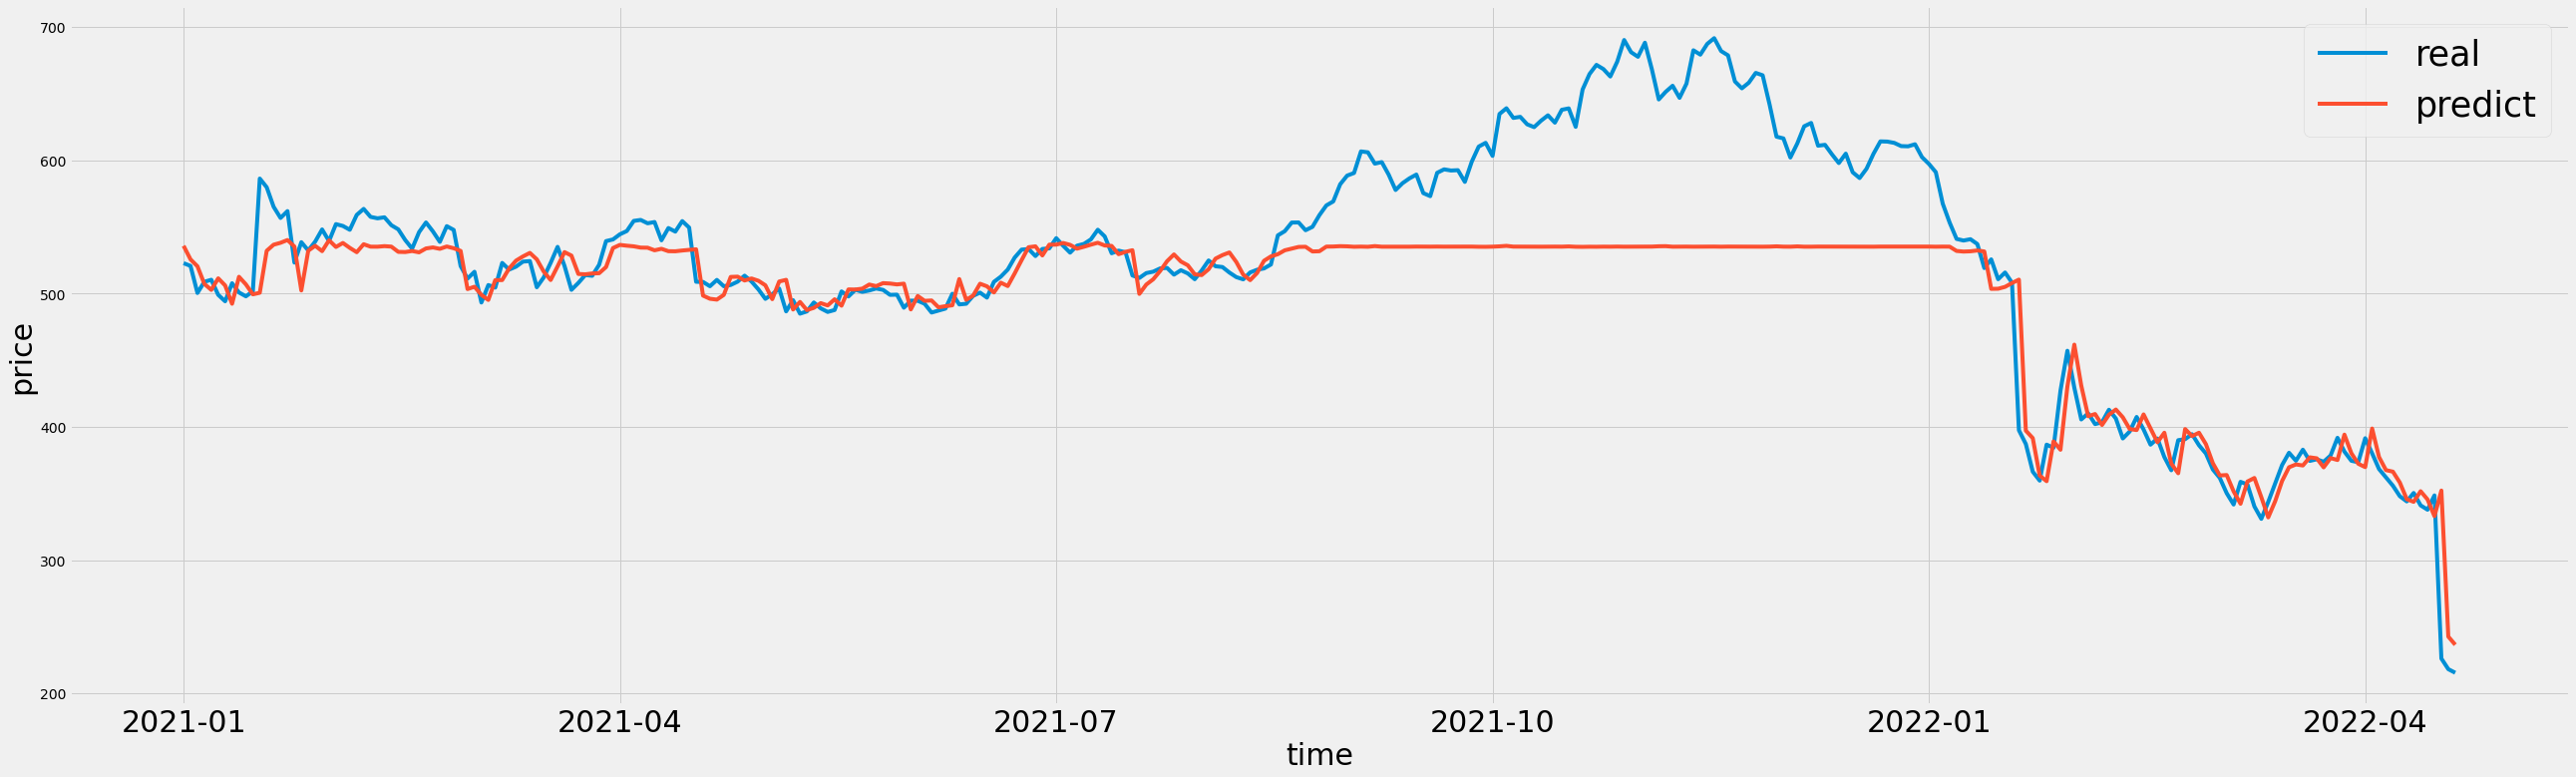

In [ ]:
#画出预测图
plt.figure(figsize(40,12))
plt.plot(date.loc[1002:1330],y_test,label="real")
plt.plot(date.loc[1002:1330],rf_predict,label="predict")
plt.xlabel("time",fontsize=30)
plt.xticks(date.loc[1002:1330][::63],labels=['2021-01','2021-04','2021-07','2021-10','2022-01','2022-04'],fontsize=30)
plt.ylabel("price",fontsize=30)
plt.legend(loc="upper right",fontsize=35)
plt.show()

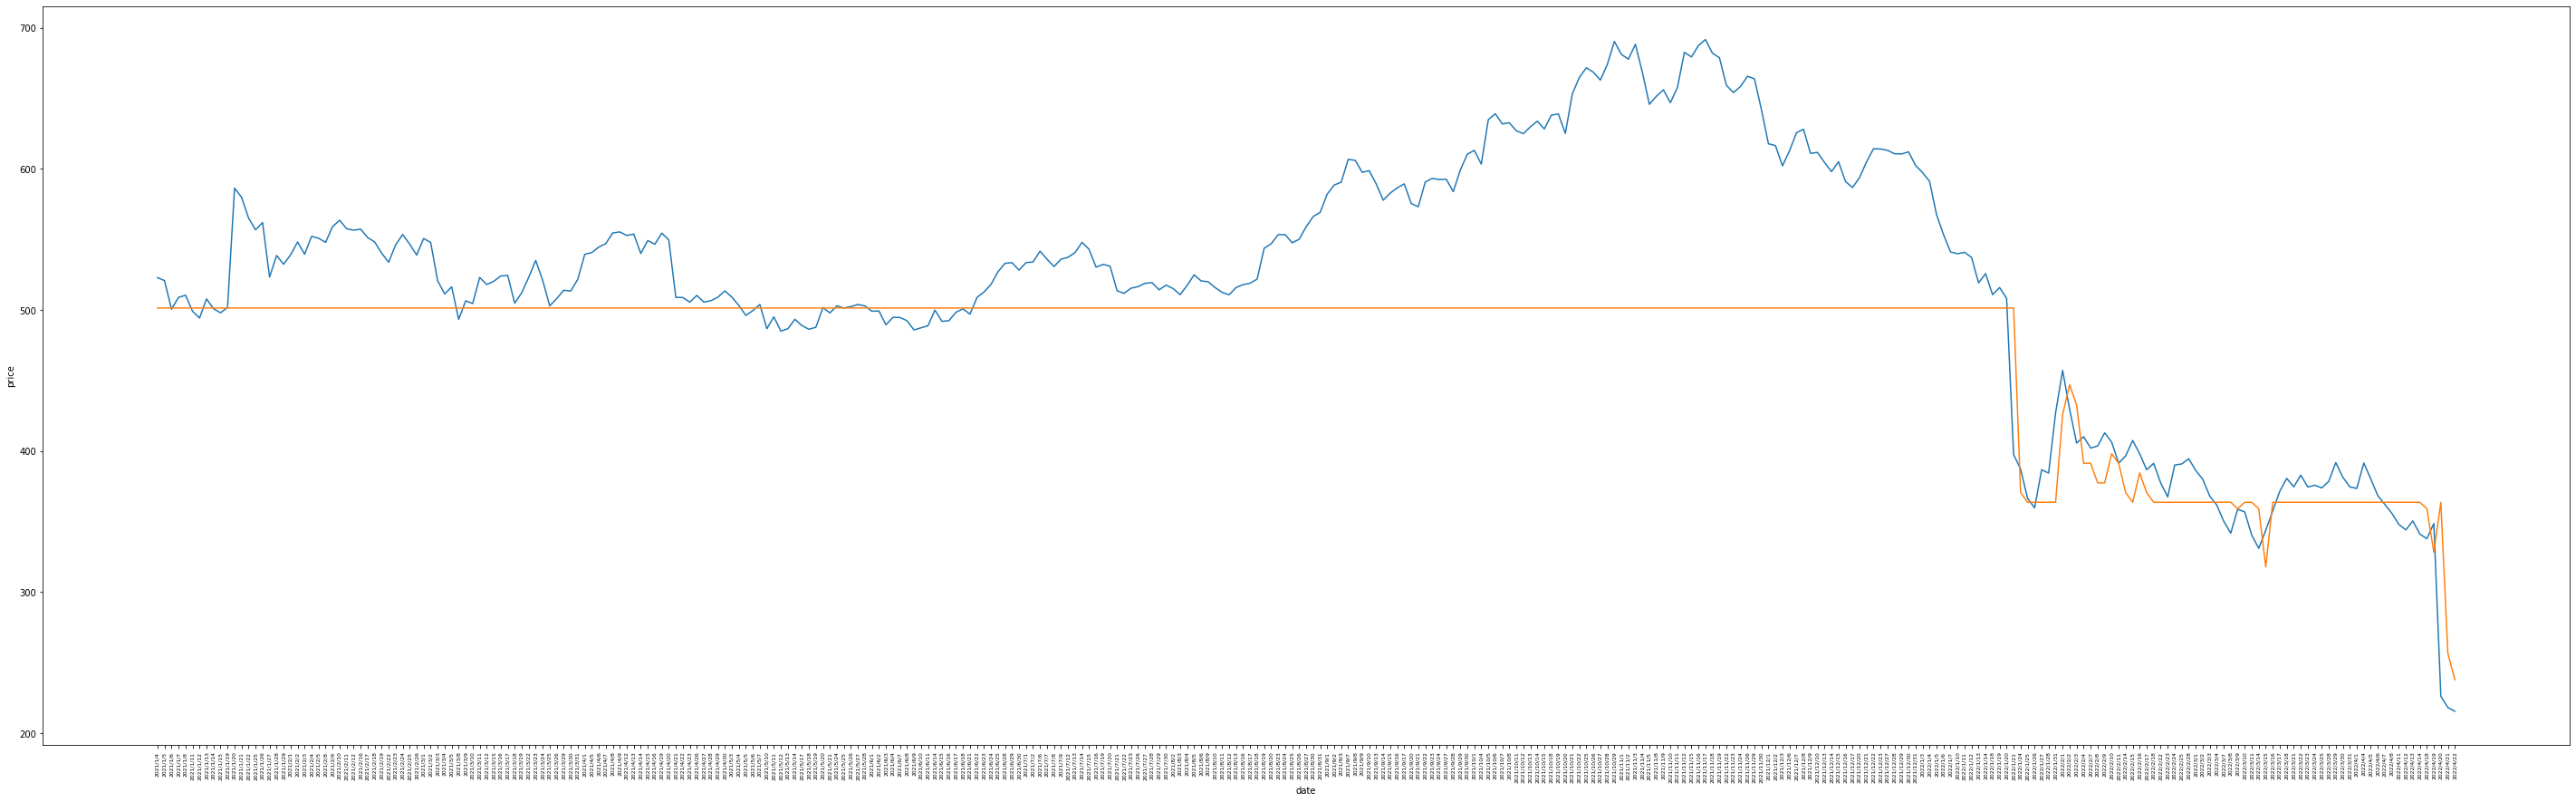

In [ ]:
#画出small tree 预测图
plt.figure(figsize(50,15))
plt.plot(date.loc[1002:1330],y_test,label="real")
plt.plot(date.loc[1002:1330],rf_small_predict,label="predict")
plt.xlabel("date")
plt.xticks(rotation=90,fontsize=6)
plt.ylabel("price")
plt.show()

XGboost

In [ ]:
#Xgboost
import xgboost as xgb

model = xgb.XGBRegressor(max_depth=6,learning_rate=0.1,n_estimators=200,randam_state=42,objective ='reg:squarederror')
model.fit(X_train,y_train)
xg_predict=model.predict(X_test)

xg_MSE=mean_squared_error(y_test,xg_predict)
print(xg_MSE)
xg_r2=r2_score(y_test,xg_predict)
print(xg_r2)

3510.0921532509715
0.5732095328294075


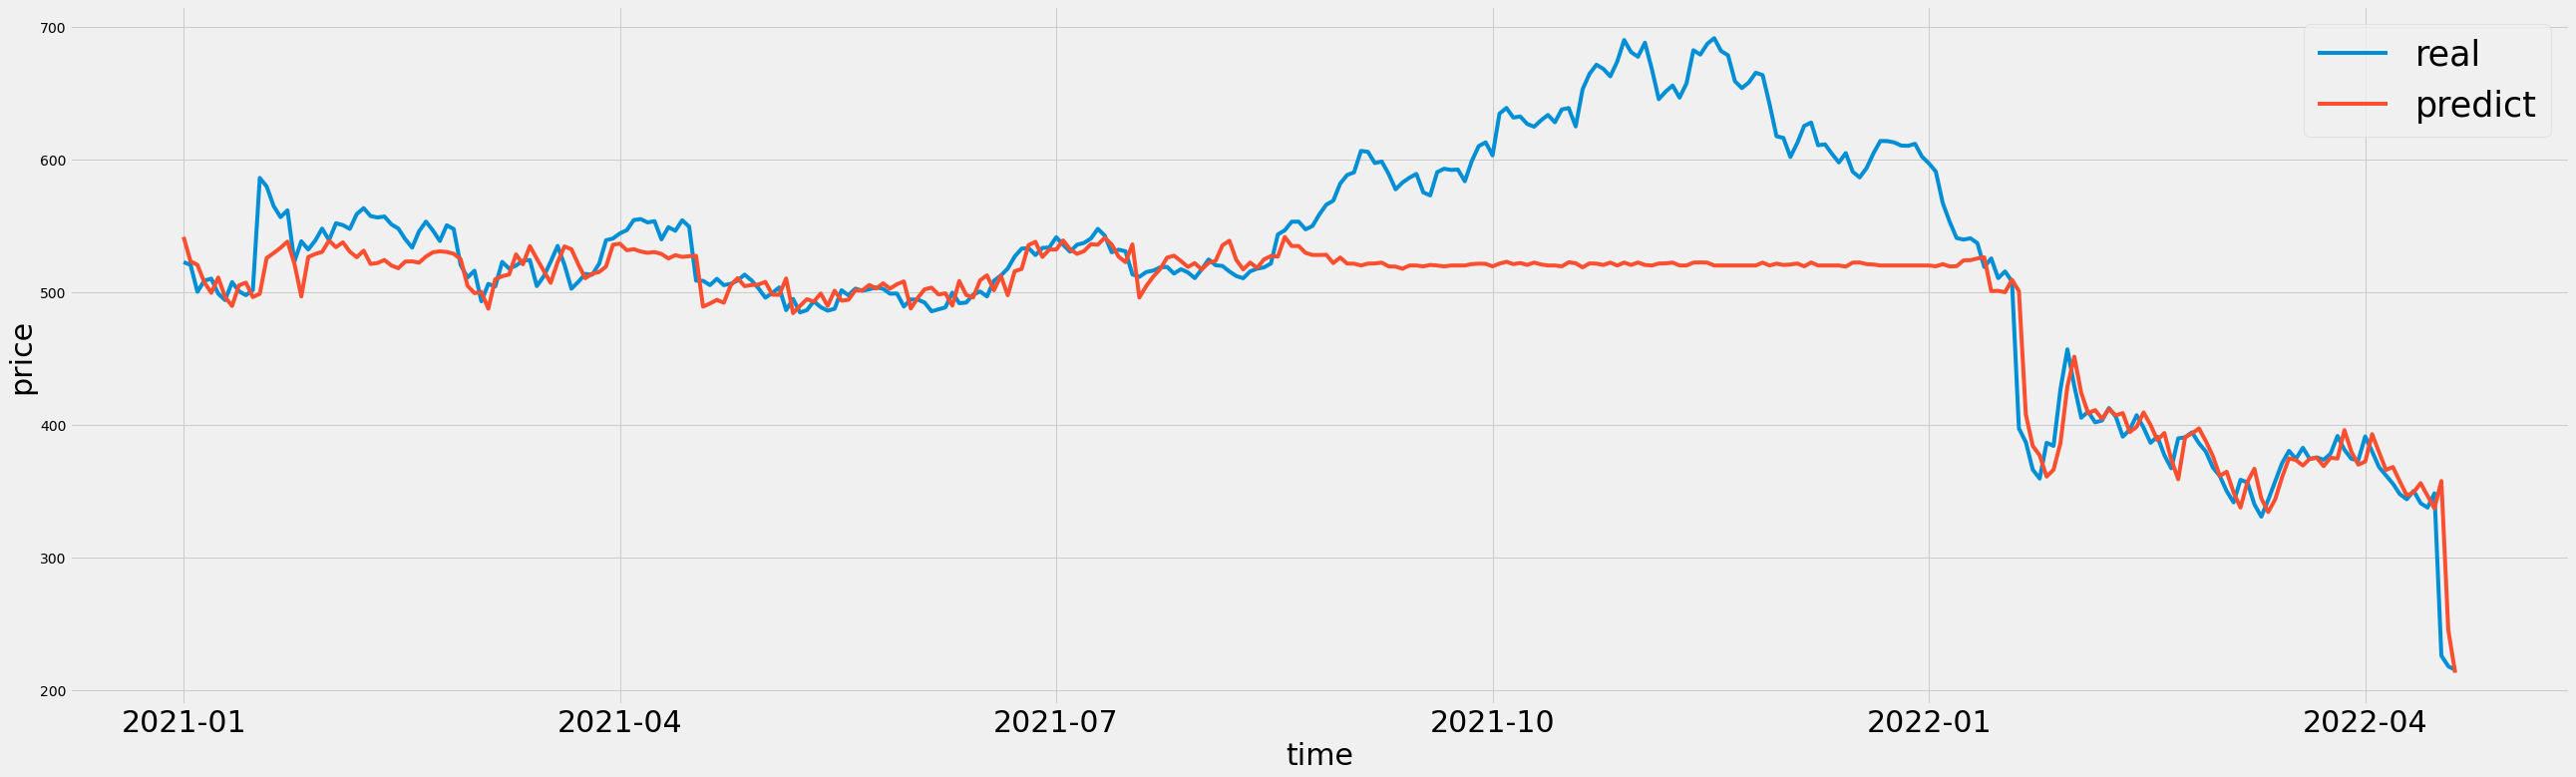

In [ ]:
plt.figure(figsize(40,12))
plt.plot(date.loc[1002:1330],y_test,label="real")
plt.plot(date.loc[1002:1330],xg_predict,label="predict")
plt.xlabel("time",fontsize=30)
plt.xticks(date.loc[1002:1330][::63],labels=['2021-01','2021-04','2021-07','2021-10','2022-01','2022-04'],fontsize=30)
plt.ylabel("price",fontsize=30)
plt.legend(loc="upper right",fontsize=35)
plt.show()

LSTM

In [ ]:
#LSTM